# ベイズ的線形回帰によるモデル推定

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 推定するモデル  
$ y = x^3\sin x -2x^2 + 0.2x$

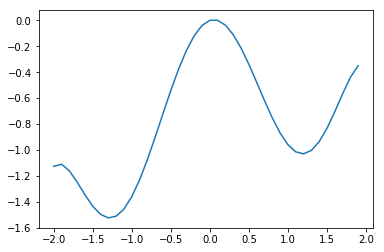

In [2]:
def truef(x):
    return (x**3) * np.sin(x) - 2*x*x + 0.2*x

test_X = np.arange(-2.0,2.0,0.1)
test_Y = truef(test_X)
plt.plot(test_X,truef(test_X))
plt.show()

In [3]:
#サンプルデータの作成　（サンプル数N=10,20,50,100,150,200)
N_list=[10,20,50,100,150,200]
Xdata_list = []
Ydata_list = []
for i,N in enumerate(N_list):
    Xdata_list.append(np.arange(-2.0,2.0,4.0/N))
    tmp = truef(Xdata_list[i]) + np.random.normal(0.0,1.0,N)
    Ydata_list.append(tmp)

### ベイズ的線形回帰による推定  
$\displaystyle y = \sum_{k=0}^K b_k \phi_k(x) + \varepsilon \qquad \varepsilon \sim N(0,\beta)$  
$ b_i \sim N(0,\alpha^{-1}) $

In [4]:
from LinearRegression import LinearRegression

#### $\phi_k(x) = x^k$の場合

14
evidence(N=10): -5.1554788017839055
3
evidence(N=20): -13.486869742303845
3
evidence(N=50): -26.910664446373612
5
evidence(N=100): -66.30694795802322
5
evidence(N=150): -78.5343498218863
5
evidence(N=200): -109.51978501497612


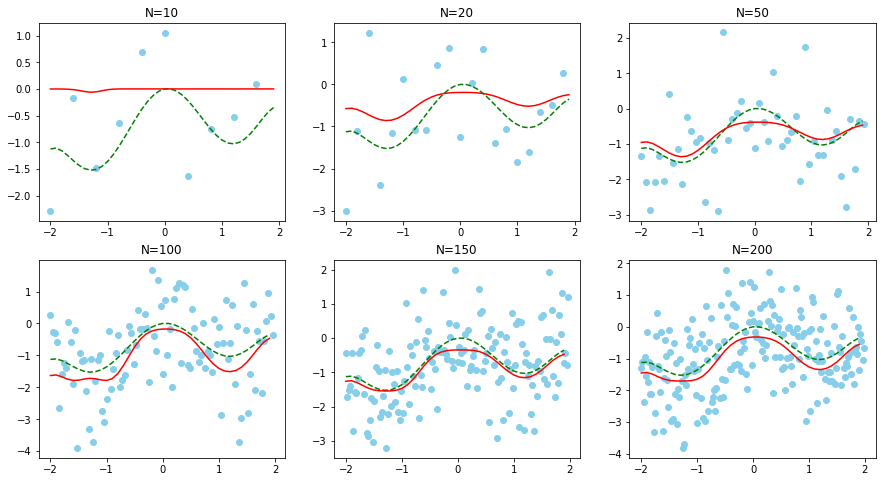

In [5]:
plt.figure(figsize=(15,8))
for i,N in enumerate(N_list):
    X = Xdata_list[i]
    Y = Ydata_list[i]
    #サンプルデータと真の分布のプロット
    plt.subplot(2,3,i+1)
    plt.title("N={}".format(N))
    plt.scatter(X,Y,color='skyblue')
    plt.plot(test_X, test_Y, linestyle='dashed', color='green')
    #推定
    model = LinearRegression(phi='poly',K=15)
    model, score = model.Ktuning(X,Y)
    print(model.K)
    print("evidence(N={}): {}".format(N,score))
    plt.plot(test_X, model.predict(test_Y), color='red')
plt.show()

## ARDスパース回帰  
ARD:パラメータを自動で取捨選択する. （今回の場合はどの基底関数$\phi_k$を使うかどうか)  
$\displaystyle y = \sum_{k=0}^K b_k \phi_k(x) + \varepsilon \qquad \varepsilon \sim N(0,\beta)$  
$ b_i \sim N(0,\alpha_i^{-1}) $  
*$b_i$の分散値に自由度があり, 推定にいらないものは$\alpha_i\to\infty$になり消える.

In [6]:
from ARDSparceRegression import ARDSparceRegression

2
evidence(N=10): -5.622322667641967
1
evidence(N=20): -12.301744911422414
3
evidence(N=50): -27.626829518143456
3
evidence(N=100): -56.2456808453724
5
evidence(N=150): -81.08409238189542
4
evidence(N=200): -107.08355667907102


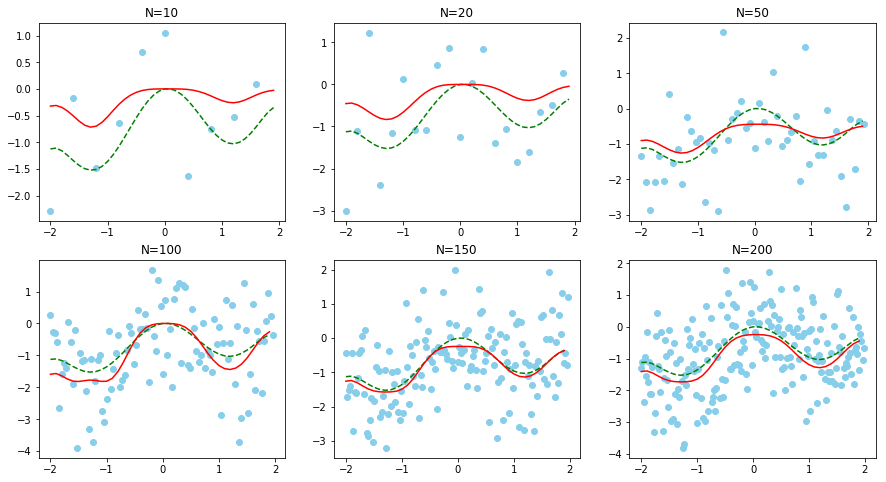

In [7]:
plt.figure(figsize=(15,8))
ard_model_list=[]
for i,N in enumerate(N_list):
    X = Xdata_list[i]
    Y = Ydata_list[i]
    #サンプルデータと真の分布のプロット
    plt.subplot(2,3,i+1)
    plt.title("N={}".format(N))
    plt.scatter(X,Y,color='skyblue')
    plt.plot(test_X, test_Y, linestyle='dashed', color='green')
    #推定
    model = ARDSparceRegression(phi='poly',K=15)
    model.fit(X,Y)
    print(model.K)
    print("evidence(N={}): {}".format(N,model.score(X,Y)))
    plt.plot(test_X, model.predict(test_Y), color='red')
    ard_model_list.append(model)
plt.show()

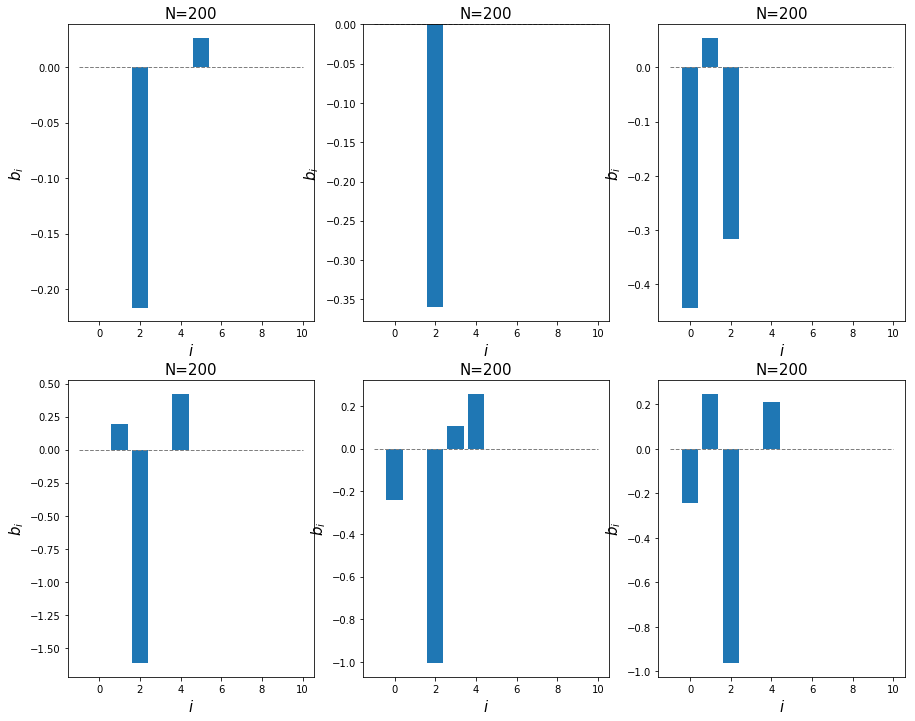

In [8]:
plt.figure(figsize=(15,12))
for i,model in enumerate(ard_model_list):
    plt.subplot(2,3,i+1)
    k_list = model.k_list
    weight = model.weight_expv
    wlist = np.array([0.0 for i in range(10)])
    ilist=np.array([i for i in range(10)])
    for j,k in enumerate(k_list):
        wlist[k] = weight[j]
    plt.title("N={}".format(N),fontsize=15)
    plt.xlabel('$i$',fontsize=15)
    plt.ylabel('$b_i$',fontsize=15)
    plt.hlines([0.0],-1,10,color='grey',linestyle='dashed',linewidth=1.0)
    plt.bar(ilist,wlist)
plt.show()